<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Visualizing_Embedding_Tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/i40-Tools/I40KG-Embeddings.git

Cloning into 'I40KG-Embeddings'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 115 (delta 56), reused 37 (delta 9), pack-reused 0
Receiving objects: 100% (115/115), 22.62 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
!pip3 install rdflib

     |████████████████████████████████| 348kB 10.0MB/s 
     |████████████████████████████████| 51kB 22.8MB/s 


In [3]:
%ls

I40KG-Embeddings/  sample_data/


In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json
from rdflib import Graph


In [0]:
def tsne_plot(labels, tokens):
    "Creates and TSNE model and plots it"
    #labels = []
    #tokens = []

    #for word in model.wv.vocab:
    #    tokens.append(model[word])
    #    labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

11


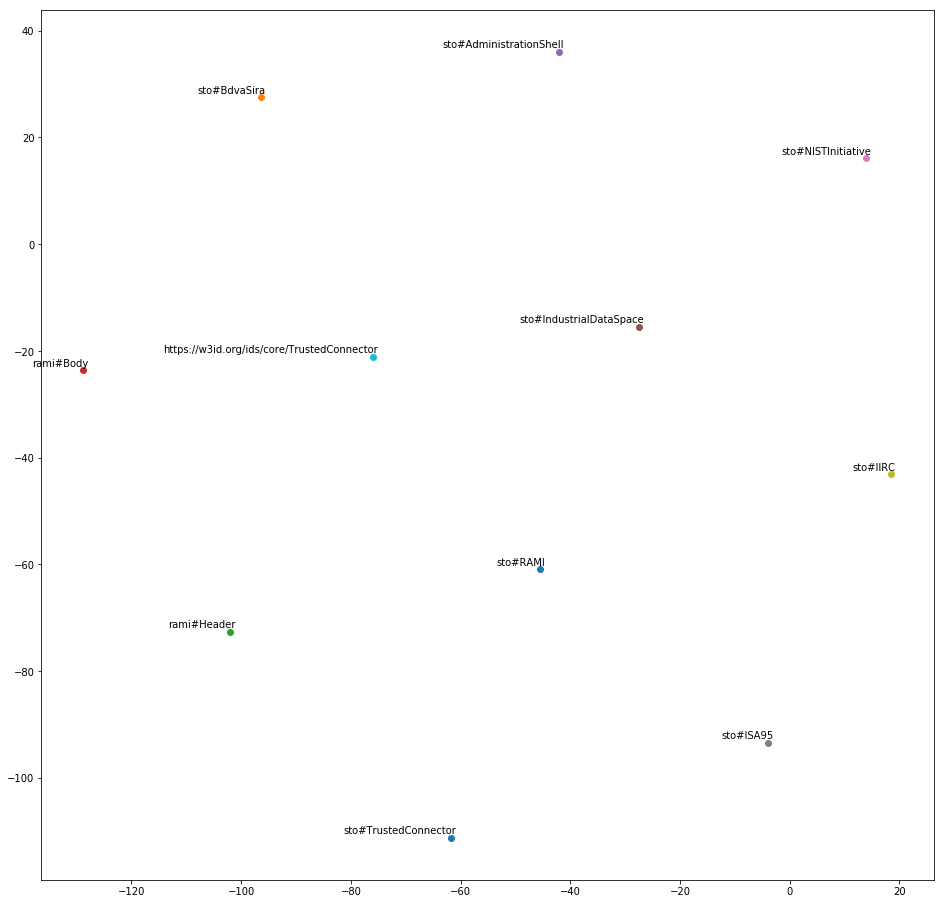

In [8]:
g = Graph()
g.parse("/content/I40KG-Embeddings/sto/sto.nt", format="nt")
    
len(g) # prints 2
 #check printing of the graph    
'''for stmt in g:
    pprint.pprint(stmt)'''

#query to get the framework/standard from the sto.nt file
#to get standards we have to replace sto:StandardizationFramework by sto:Standard in the query
#we can get standards of the frameworks as well by just changing the query

qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:StandardizationFramework .
            } limit 1000""")
    
labels = []
tokens = []
  
#to get the corresponding embeddings of the frameworks/standards from the json file 
with open("/content/I40KG-Embeddings/logs_sto/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            labels.append(key.replace('https://w3id.org/i40/', ''))
            tokens.append(array[key])
            
print(len(labels))

tsne_plot(labels, tokens)
